# COGS 108 Final Project - Tech Industry Turnover

# Overview

Our project analyzes the reason why large companies in the tech industry experience one of the highest turnover rates in the business world. In this project, comb through and analyze a dataset in order to determine whether factors like work environment or compensation may be a reason to leave 'dream jobs' at these companies. The analysis starts by looking at the numerical ratings given to these companies and later moves on to the most significant part of the analysis: the text reviews left by current or former employees of these tech companies.

# Introduction/Background

Google, Amazon, Facebook, Apple, Microsoft, and Netflix are world renowned technology companies. For many looking to get into the industry, jobs at these companies are considered “dream” jobs. According to the associate chair of the Department of Computer Sciences at the University of Wisconsin—Madison, “most computer science grads end up within the industry, such as at Google, Microsoft, Amazon, and Apple, while some go the academic route and  
become successful professors at top institutions.” 
(https://www.usnews.com/education/best-graduate-schools/articles/2019-03-19/3-reasons-to-earn-a-graduate-computer-science-degree-in-the-us). 

“996.ICU”(https://github.com/996icu/996.ICU) is a hot debate topic in China right now. “996.ICU” refers to the fact that the employees, especially those who work in the fields related to technology, in large tech companies like JD.com, Inc., Alibaba, and etc. are facing the situation that they have to work from 9 a.m. to 9.p.m and six days a week. Despite their infamous working load, a lot of people still try to get into these companies.  Yet the turnover rate is still high, “the average tenure in Silicon Valley is 3.65 years, whereas in Chinese tech firms the figure is less                                
than 2.6 years”  (https://www.scmp.com/tech/apps-social/article/3002533/no-sleep-no-sex -no-life-tech-workers-chinas-silicon-valley-face). The overlap of the high turnover rate may indicate that these grueling working hours is a problem throughout the internet industry. 

It takes a lot of effort for people to land jobs at these companies, and one would assume those who get the jobs would stay at the company for a relatively long time regarding the endeavour they made; however, the dataset disaccords with this assumption.  We are intrigued by why people would leave their jobs in these large companies and hope to explore the reasons for the dimission this based on the information provided by the dataset. 



# Research Question

An article published in Business Insider by Kaylee Fagan (https://www.businessinsider.com/average-employee-tenure-retention-at-top-tech-companies-2018-4#at-facebook-a-25-year-stint-is-the-average-5) reported the average stay at some of the world’s biggest tech companies, and it was found that much to our surprise, the average stay at many of these large companies is less than 5 years. We want to know why people leave these jobs so quickly, considering how prestigious and sought after these roles are. Our question is:

Is the turnover rate for large tech companies such as Google, Amazon, FB so high because of corporate politics, work environment, compensation, or other hidden factors?

# Hypothesis

Our hypothesis is that people are leaving these “dream” jobs because of a combination of corporate politics, competitive and stressful work environment, and unsatisfactory compensation.

# Names and PIDs

- AXXXXXXXX 
- AXXXXXXXX 
- AXXXXXXXX 
- AXXXXXXXX 
- AXXXXXXXX 

# Data Description

__Dataset Name: Employee Reviews__ 
- Link to the dataset: https://drive.google.com/a/ucsd.edu/file/d/1zoxIdsF_73jwHadL8iNR6rwOz5X_0Wwb/view?usp=sharing 
- Number of Observations: 67,500+

__High level description:__
Previous and current employees rated their overall working experiences with technology companies including Google, Amazon, Facebook, Apple, Microsoft, and Netflix. Data are stored in Excel and csv file and each observation is in a separate row

__Categorical data:__
- Working location
- Job title
- Company
- Work balance stars*
- Culture values stars*
- Career opportunities stars*
- Company benefit stars*
- Senior management stars*

__Numerical data:__
- Overall rating
- ** The stars columns will be used as numerical data when we later convert them to floats

__Other data:__ 
- Summary
- Pros and cons of working in those companies.
- Advice to management.
- Link


# Setup

We first imported the necessary librarys for our analysis and then created a pandas DataFrame from our dataset so we can easily manipulate and clean our data.

In [2]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for text analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jonbi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonbi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonbi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 50
pd.options.display.max_columns = 12

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [4]:
df_reviews = pd.read_csv('employee_reviews.csv')
df_reviews.head()

,Unnamed: 0,company,location,dates,job-title,summary,...,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,...,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...",...,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,...,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,...,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",...,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


# Data Cleaning/Pre-Processing

At first glance, the dataframe created from the csv file looked very messy, with column names formatted unconventionally and spelled incorrectly, as well as many unnecessary observations with missing values. To start off the data cleaning process, we decided to drop some columns that we felt were unneeded in determining why the turnover rate was so high for large tech companies. We also decided to rename most of the columns to fit naming conventions for variables in a dataset.

In [5]:
df_reviews.drop(columns={'Unnamed: 0', 
                         'job-title',
                         'dates', 
                         'link', 
                         'carrer-opportunities-stars',
                         'senior-mangemnet-stars',
                         'company',
                         'location'}, inplace=True)
df_reviews.rename(columns={'advice-to-mgmt':'advice_to_management', 
                           'overall-ratings':'overall_ratings', 
                           'work-balance-stars':'work_balance',
                           'culture-values-stars':'culture_and_values',
                           'comp-benefit-stars': 'compensation_and_benefits',
                           'helpful-count':'how_many_found_this_helpful'}, inplace=True)
df_reviews.head()

,summary,pros,cons,advice_to_management,overall_ratings,work_balance,culture_and_values,compensation_and_benefits,how_many_found_this_helpful
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,4.0,0
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,5.0,2094
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,949
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,4.0,498
4,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,49


In addition to dropping unnecessary columns, we also dropped rows where zero people found the review helpful in order to reduce the amount of observations but keep enough relevant information. We also dropped rows where information or data was missing, which were the rows with 'none' and converted the columns which had numerical categorical data to floats (originally the stars columns).

In [6]:
df_reviews = df_reviews[df_reviews.summary != 'none']
df_reviews = df_reviews[df_reviews.pros != 'none']
df_reviews = df_reviews[df_reviews.cons != 'none']
df_reviews = df_reviews[df_reviews.advice_to_management != 'none']
df_reviews = df_reviews[df_reviews.work_balance != 'none']
df_reviews = df_reviews[df_reviews.culture_and_values != 'none']
df_reviews = df_reviews[df_reviews.compensation_and_benefits != 'none']

df_reviews.work_balance = df_reviews.work_balance.astype(float)
df_reviews.culture_and_values = df_reviews.culture_and_values.astype(float)
df_reviews.compensation_and_benefits = df_reviews.compensation_and_benefits.astype(float)

df_reviews = df_reviews[df_reviews.how_many_found_this_helpful > 0]
df_reviews.dropna(inplace=True)
df_reviews.head()

,summary,pros,cons,advice_to_management,overall_ratings,work_balance,culture_and_values,compensation_and_benefits,how_many_found_this_helpful
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,5.0,2094
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,949
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,4.0,498
4,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,49
27,"Not perfect, but still the best place in the w...","- A company culture that encourages dissent, d...",- A company with over 90k people at the time o...,- Just because a small percentage of the compa...,5.0,5.0,5.0,5.0,3


# Data Analysis & Results

## Initial Numerical and Distribution Analysis

To start off the data analysis, we decided to look at a scatter matrix of all of the numerical data in the dataframe, which consisted of the ratings as well as the number of people who found a review helpful.

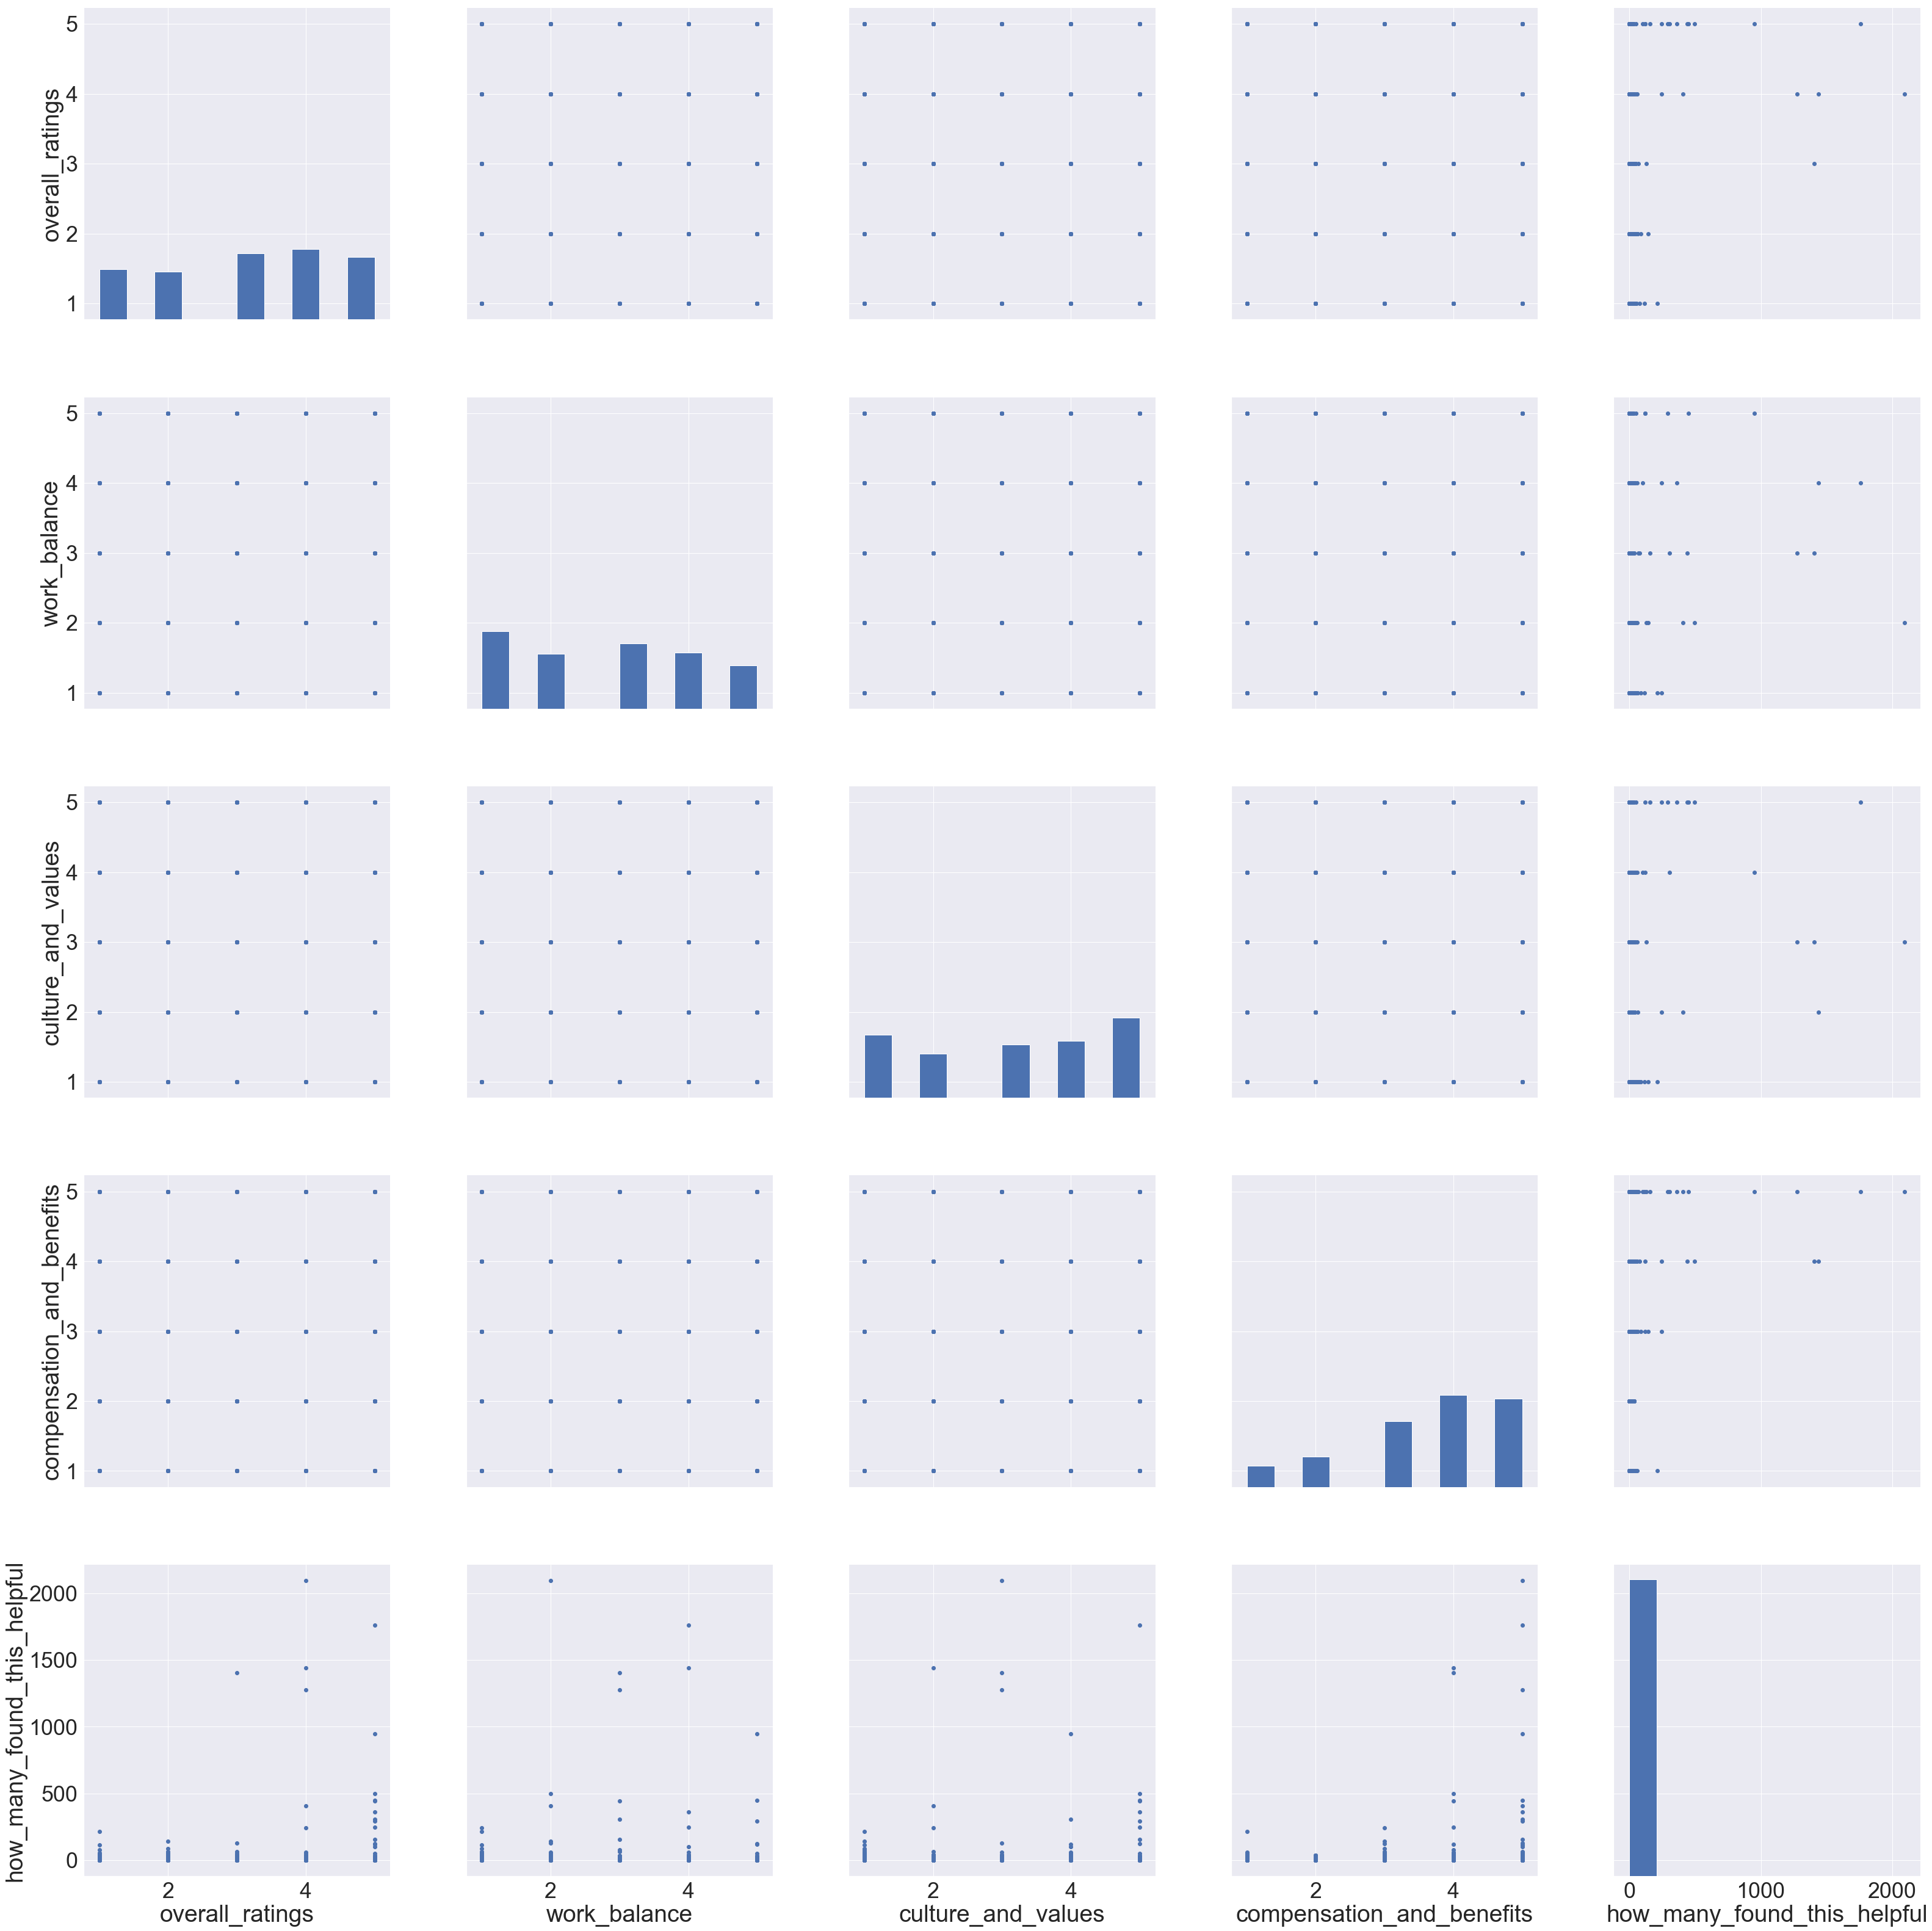

In [7]:
sns.set(font_scale=3.25)
scax=sns.PairGrid(df_reviews, height=9)
scax = scax.map_diag(plt.hist)
scax = scax.map_offdiag(plt.scatter)

The scatter matrix ended up being very hard to read, but we extracted the more significant parts of the matrix which were scatterplots modeling the relationships between ratings and the amount of people who found a review helpful. We're using the 'helpful' variable as it can show whether many people agree with a review or find it accurate.

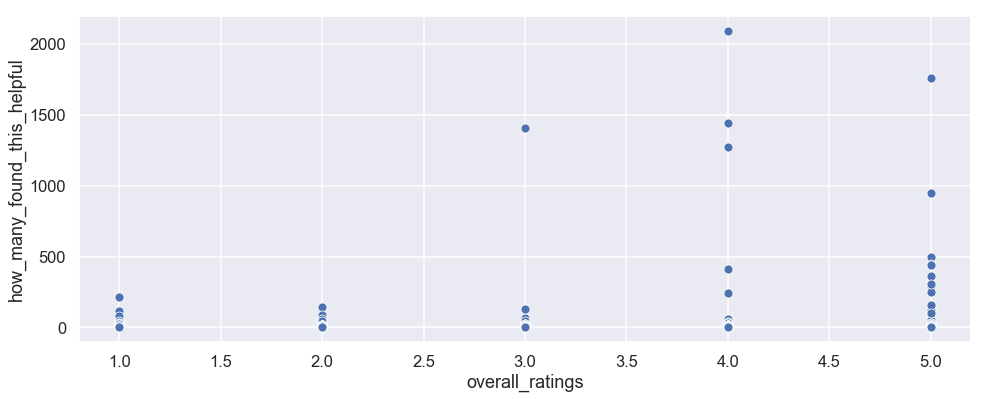

In [8]:
sns.set()
sns.set_context('talk')
plt.figure(figsize=(16, 6))
ax=sns.scatterplot(x='overall_ratings',
                   y='how_many_found_this_helpful',
                   data=df_reviews)

In this scatterplot, a rough estimate of the relationship between overall ratings and the amount of people who found a review with a particular score helpful is shown where a high density of higher points seem to be concentrated in the 4 or 5 range meaning that more people found reviews with an overall rating of 4 or 5 of the company more helpful than lower ratings. This may imply a positive view of the overall company. However, we don't truly know as we don't have an actual count of the amount of people who found a review helpful, so we can try to model this distribution with a barplot and summing the values in the 'how_many_found_this_helpful' column where a rating appears. We can then make another bar plot where we model how many reviews actually gave these ratings and compare the two.

In [9]:
# Function to Help Create Dataframes for Barplots and 'histogram'
def df_bar_create(dataframe, column_series, column_name):
    i = 1
    temp_list_sum = []
    temp_list_value = []
    out_df = pd.DataFrame()
    while i < 6: 
        temp_list_sum.append(dataframe[column_series == i].how_many_found_this_helpful.sum())
        temp_list_value.append(i)
        i += 1
    rating_col_name = column_name + '_ratings'
    out_df[rating_col_name] = pd.Series(temp_list_value)
    out_df['helpful_count'] = pd.Series(temp_list_sum)
    return out_df

def df_hist_create(dataframe, column_series, column_name):
    i = 1
    temp_list_sum = []
    temp_list_value = []
    out_df = pd.DataFrame()
    while i < 6: 
        temp_list_sum.append(len(dataframe.loc[column_series == i]))
        temp_list_value.append(i)
        i += 1
    rating_col_name = column_name + '_ratings'
    out_df[rating_col_name] = pd.Series(temp_list_value)
    out_df['reviews_count'] = pd.Series(temp_list_sum)
    return out_df

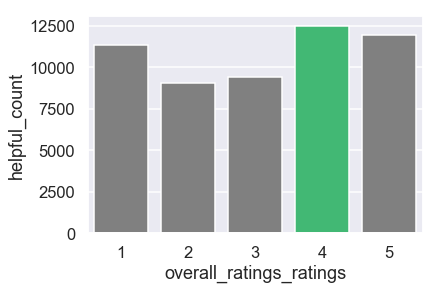

In [10]:
sns.set()
sns.set_context('talk')
overall_ratings_df = df_bar_create(df_reviews, df_reviews.overall_ratings, 'overall_ratings')
clrs = ['grey' if (x < max(overall_ratings_df.helpful_count)) else '#2ecc71' for x in overall_ratings_df.helpful_count ]
ax=sns.barplot(x='overall_ratings_ratings',
               y='helpful_count',
               data=overall_ratings_df,
               palette=clrs)

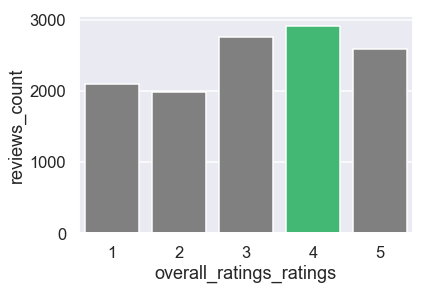

In [11]:
overall_ratings_df = df_hist_create(df_reviews, df_reviews['overall_ratings'], 'overall_ratings')
clrs = ['grey' if (x < max(overall_ratings_df.reviews_count)) else '#2ecc71' for x in overall_ratings_df.reviews_count ]
ax=sns.barplot(x='overall_ratings_ratings',
               y='reviews_count',
               data=overall_ratings_df,
               palette=clrs)

In the above barplots, we see that the reviews with an overall rating of 4 for the company were seen to be the most helpful to people, while the reviews with an overall rating of 5 and 1 compete closely with them. We also see that less people making the reviews gave a score of 1, suggesting that there are a higher density of people finding reviews with a rating of 1 helpful. Overall, however, many people seem to be giving companies a high rating, so why is there a high turnover rate? We can continue analyzing the other columns to find out. 

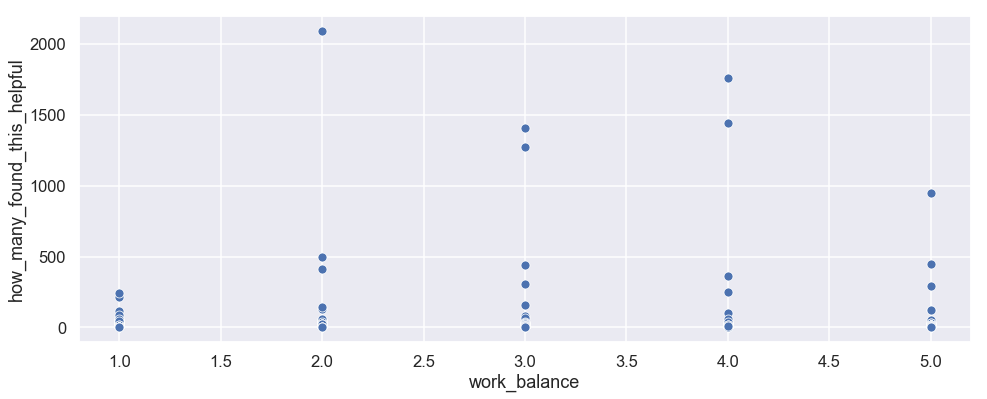

In [19]:
plt.figure(figsize=(16, 6))
work_balance_scatterframe = df_reviews.sort_values(by=['work_balance'])
sax=sns.scatterplot(x='work_balance',
                    y='how_many_found_this_helpful',
                    data=work_balance_scatterframe)

In this scatterplot, we see a much higher density of points in the lower ratings, suggesting that more people made reviews with lower ratings, and while the amount of people who found these reviews helpful might seem low, the overwhelming density of people who found this helpful might bring the collective count of helpfulness up in the reviews with lower ratings.

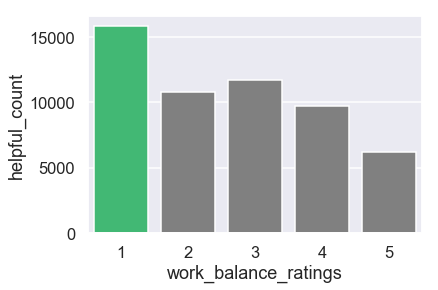

In [12]:
work_balance_df = df_bar_create(df_reviews, df_reviews.work_balance, 'work_balance')
clrs = ['grey' if (x < max(work_balance_df.helpful_count)) else '#2ecc71' for x in work_balance_df.helpful_count ]
ax=sns.barplot(x='work_balance_ratings',
               y='helpful_count',
               data=work_balance_df,
               palette=clrs)

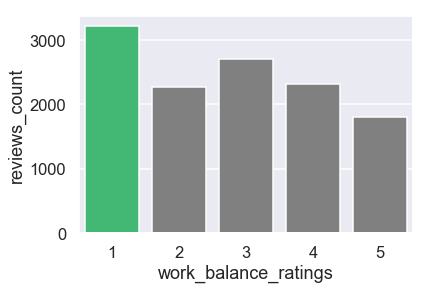

In [13]:
work_balance_df = df_hist_create(df_reviews, df_reviews['work_balance'], 'work_balance')
clrs = ['grey' if (x < max(work_balance_df.reviews_count)) else '#2ecc71' for x in work_balance_df.reviews_count ]
ax=sns.barplot(x='work_balance_ratings',
               y='reviews_count',
               data=work_balance_df,
               palette=clrs)

From the barplots above, we see that our hypothesis about the scatterplot was correct. There are an overwhelming amount of people who found reviews with ratings of 1 helpful as well as an overwhelming amount of people who made reviews with a rating of 1. This may suggest that work balance might not be one of the most ideal aspects of joining a such large tech companies.

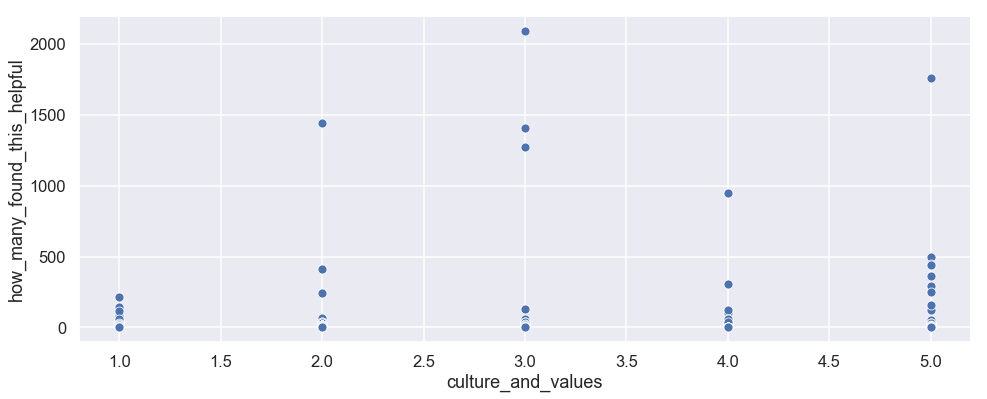

In [14]:
plt.figure(figsize=(16, 6))
culture_and_values_scatterframe = df_reviews.sort_values(by=['culture_and_values'])
sax=sns.scatterplot(x='culture_and_values',
                    y='how_many_found_this_helpful',
                    data=culture_and_values_scatterframe)

For culture and values, there seems to be a high density of points at both ratings of 1 and ratings of 5 suggesting that the amount of people who found reviews with a certain culture and value rating helpful may have a bimodal distribution. 

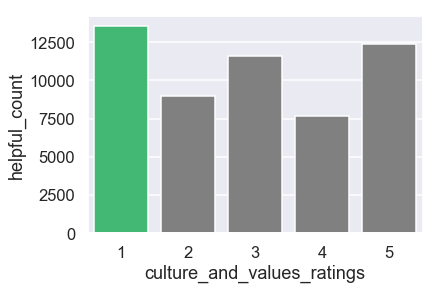

In [15]:
culture_and_values_df = df_bar_create(df_reviews, df_reviews.culture_and_values, 'culture_and_values')
clrs = ['grey' if (x < max(culture_and_values_df.helpful_count)) else '#2ecc71' for x in culture_and_values_df.helpful_count ]
ax=sns.barplot(x='culture_and_values_ratings',
               y='helpful_count',
               data=culture_and_values_df,
               palette=clrs)

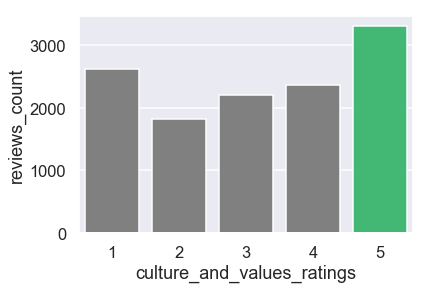

In [16]:
culture_and_values_df = df_hist_create(df_reviews, df_reviews['culture_and_values'], 'culture_and_values')
clrs = ['grey' if (x < max(culture_and_values_df.reviews_count)) else '#2ecc71' for x in culture_and_values_df.reviews_count ]
ax=sns.barplot(x='culture_and_values_ratings',
               y='reviews_count',
               data=culture_and_values_df,
               palette=clrs)

From the above barplots, we see that the most amount of people found reviews with a culture and values rating of 1 helpful compared to other reviews with different ratings. However, we see that more people making reviews actually rated culture and values at a high 5. There's an odd disparity between the rating that most people found helpful and the rating that most reviewers gave for culture and values, so the verdict is still out for whether the culture and values of these companies positively or negatively affect employees' experiences.

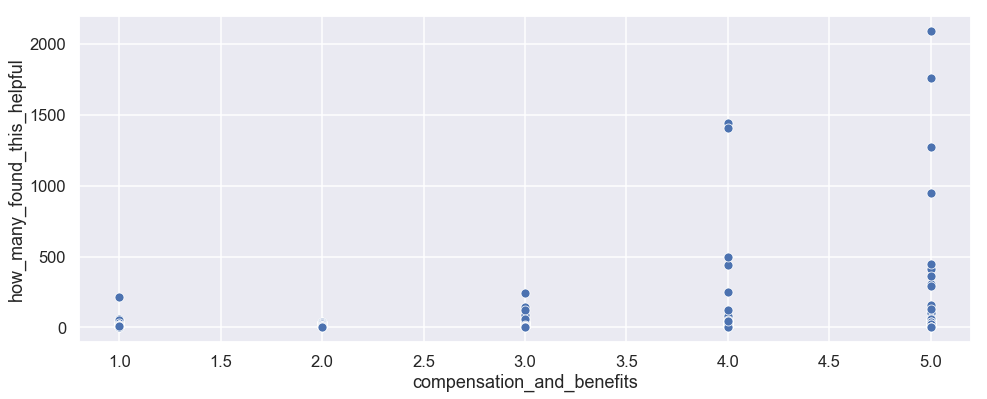

In [17]:
plt.figure(figsize=(16, 6))
compensation_and_benefits_scatterframe = df_reviews.sort_values(by=['compensation_and_benefits'])
sax=sns.scatterplot(x='compensation_and_benefits',
                    y='how_many_found_this_helpful',
                    data=compensation_and_benefits_scatterframe)

From the above scatterplot, there is a very high density of points concentrated in the higher ratings, implying that there seems to be no problem with the compensation and benefits given by these companies.

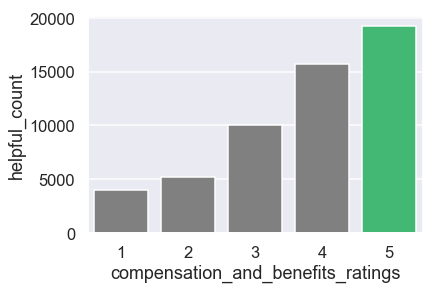

In [18]:
compensation_and_benefits_df = df_bar_create(df_reviews, df_reviews.compensation_and_benefits, 'compensation_and_benefits')
clrs = ['grey' if (x < max(compensation_and_benefits_df.helpful_count)) else '#2ecc71' for x in compensation_and_benefits_df.helpful_count]
ax=sns.barplot(x='compensation_and_benefits_ratings',
               y='helpful_count',
               data=compensation_and_benefits_df,
               palette=clrs)

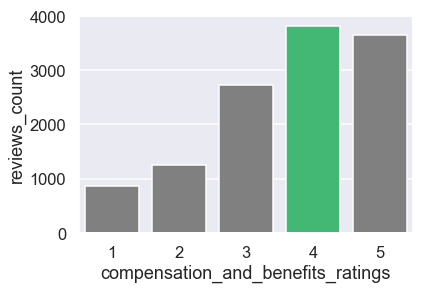

In [19]:
compensation_and_benefits_df = df_hist_create(df_reviews, df_reviews['compensation_and_benefits'], 'compensation_and_benefits')
clrs = ['grey' if (x < max(compensation_and_benefits_df.reviews_count)) else '#2ecc71' for x in compensation_and_benefits_df.reviews_count ]
ax=sns.barplot(x='compensation_and_benefits_ratings',
               y='reviews_count',
               data=compensation_and_benefits_df,
               palette=clrs)

The above barplots just further confirm the assumption made from the scatterplot as many more people found reviews with a high rating for compensation and benefits helpful and many more reviewers gave compensation and benefits a high rating. As a result, we can be close to sure that compensation and benefits given by a company have little effect in the turnover rate.

In [20]:
df_reviews.corr()

,overall_ratings,work_balance,culture_and_values,compensation_and_benefits,how_many_found_this_helpful
overall_ratings,1.00e+00,0.63,0.79,5.46e-01,-6.51e-03
work_balance,6.28e-01,1.00,0.58,4.29e-01,-1.32e-02
culture_and_values,7.87e-01,0.58,1.00,4.69e-01,-1.85e-02
compensation_and_benefits,5.46e-01,0.43,0.47,1.00e+00,9.85e-03
how_many_found_this_helpful,-6.51e-03,-0.01,-0.02,9.85e-03,1.00e+00


The above correlation table can also give us an insight behind the relationships between certain variables. For example, there seems to be a positive correlation between overall rating, work balance, and culture and values suggesting that the higher the rating is for work balance and culture and values, the higher the overall rating is.

In [21]:
df_reviews.describe()

,overall_ratings,work_balance,culture_and_values,compensation_and_benefits,how_many_found_this_helpful
count,12317.00,12317.00,12317.00,12317.00,12317.0
mean,3.16,2.77,3.16,3.66,4.4
std,1.38,1.40,1.50,1.20,35.6
min,1.00,1.00,1.00,1.00,1.0
25%,2.00,1.00,2.00,3.00,1.0
50%,3.00,3.00,3.00,4.00,2.0
75%,4.00,4.00,5.00,5.00,4.0
max,5.00,5.00,5.00,5.00,2094.0


The summary table above also confirms most of our conclusions made from the above visualizations as there seems to be a relatively low average score for work balance and a higher average score for compensation and benefits.

## Text Analysis

In order to get a better understanding of why people leave such large tech companies beyond just numerical data, we decided to do a text analysis of the text portion of the Glassdoor reviews. We first decided to do a basic word frequency check and to do this, we modified a function provided from the tutorials.

In [22]:
def check_word_freq(word):
    """checks for frequency of word specified in text responses"""
    summary = df_reviews['summary'].str.lower().str.contains(word).sum()/df_reviews['summary'].notnull().sum()
    pros = df_reviews['pros'].str.lower().str.contains(word).sum()/df_reviews['pros'].notnull().sum()
    cons = df_reviews['cons'].str.lower().str.contains(word).sum()/df_reviews['cons'].notnull().sum()
    advice_to_management = df_reviews['advice_to_management'].str.lower().str.contains(word).sum()/df_reviews['advice_to_management'].notnull().sum()
    
    out = pd.DataFrame({'summary_freq': [summary], 'pros_freq':[pros], 'cons_freq': [cons], 'advice_freq': [advice_to_management]})
    return out

We decided to check certain words of interest that would indicate possible reasons for quitting such as: __Compensation, Benefits, Salary, Promotion, Opportunities, Management__

__Compensation__

In [23]:
check_word_freq('compensation')

,summary_freq,pros_freq,cons_freq,advice_freq
0,3.00e-03,0.04,0.03,0.01


__Benefits__

In [24]:
check_word_freq('benefits')

,summary_freq,pros_freq,cons_freq,advice_freq
0,0.02,0.29,0.03,0.01


__Salary__

In [25]:
check_word_freq('salary')

,summary_freq,pros_freq,cons_freq,advice_freq
0,2.60e-03,0.05,0.03,5.85e-03


__Promotion__

In [26]:
check_word_freq('promotion')

,summary_freq,pros_freq,cons_freq,advice_freq
0,1.14e-03,8.93e-03,0.06,0.02


__Opportunities__

In [27]:
check_word_freq('opportunities')

,summary_freq,pros_freq,cons_freq,advice_freq
0,8.69e-03,0.08,0.03,0.02


__Management__

In [28]:
check_word_freq('management')

,summary_freq,pros_freq,cons_freq,advice_freq
0,0.03,0.05,0.24,0.13


__Culture__

In [29]:
check_word_freq('culture')

,summary_freq,pros_freq,cons_freq,advice_freq
0,0.03,0.08,0.1,0.05


We also decided to create a frequency distribution just to get a visualization of the frequency of each word in the reviews.

In [30]:
# First step: tokenize data in each column
df_reviews['summary_token'] = df_reviews['summary'].apply(word_tokenize)
df_reviews['pros_token'] = df_reviews['pros'].apply(word_tokenize)
df_reviews['cons_token'] = df_reviews['cons'].apply(word_tokenize)
df_reviews['advice_token'] = df_reviews['advice_to_management'].apply(word_tokenize)
df_reviews.head()

,summary,pros,cons,advice_to_management,overall_ratings,work_balance,...,compensation_and_benefits,how_many_found_this_helpful,summary_token,pros_token,cons_token,advice_token
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,...,5.0,2094,"[Moving, at, the, speed, of, light, ,, burn, o...","[1, ), Food, ,, food, ,, food, ., 15+, cafes, ...","[1, ), Work/life, balance, ., What, balance, ?...","[1, ), Do, n't, dismiss, emotional, intelligen..."
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,...,5.0,949,"[Great, balance, between, big-company, securit...","[*, If, you, 're, a, software, engineer, ,, yo...","[*, It, *is*, becoming, larger, ,, and, with, ...","[Keep, the, focus, on, the, user, ., Everythin..."
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,...,4.0,498,"[The, best, place, I, 've, worked, and, also, ...","[You, ca, n't, find, a, more, well-regarded, c...","[I, live, in, SF, so, the, commute, can, take,...","[Keep, on, NOT, micromanaging, -, that, is, a,..."
4,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,...,5.0,49,"[Unique, ,, one, of, a, kind, dream, job]","[Google, is, a, world, of, its, own, ., At, ev...","[If, you, do, n't, work, in, MTV, (, HQ, ), ,,...","[Promote, managers, into, management, for, the..."
27,"Not perfect, but still the best place in the w...","- A company culture that encourages dissent, d...",- A company with over 90k people at the time o...,- Just because a small percentage of the compa...,5.0,5.0,...,5.0,3,"[Not, perfect, ,, but, still, the, best, place...","[-, A, company, culture, that, encourages, dis...","[-, A, company, with, over, 90k, people, at, t...","[-, Just, because, a, small, percentage, of, t..."


In [31]:
# Second step: removing stop words
stop_words = set(stopwords.words("english"))
stop_words.update(['good', 'Good', 'great','Great','You', 'n\'t', '\'s', 'I', '\'\"'])
df_reviews['summary_token'] = df_reviews['summary_token'].apply(lambda x: [item for item in x if item not in stop_words])
df_reviews['pros_token'] = df_reviews['pros_token'].apply(lambda x: [item for item in x if item not in stop_words])
df_reviews['cons_token'] = df_reviews['cons_token'].apply(lambda x: [item for item in x if item not in stop_words])
df_reviews['advice_token'] = df_reviews['advice_token'].apply(lambda x: [item for item in x if item not in stop_words])

In [32]:
# Third Step: Stem Words
ps = PorterStemmer()
df_reviews['summary_token'] = df_reviews['summary_token'].apply(lambda x: [ps.stem(y) for y in x])
df_reviews['pros_token'] = df_reviews['pros_token'].apply(lambda x: [ps.stem(y) for y in x])
df_reviews['cons_token'] = df_reviews['cons_token'].apply(lambda x: [ps.stem(y) for y in x])
df_reviews['advice_token'] = df_reviews['advice_token'].apply(lambda x: [ps.stem(y) for y in x])

In [33]:
# Fourth Step: Get series of words and calculate word frequency
summary = df_reviews['summary_token'].apply(pd.Series).stack()
pros = df_reviews['pros_token'].apply(pd.Series).stack()
cons = df_reviews['cons_token'] .apply(pd.Series).stack()
advice = df_reviews['advice_token'].apply(pd.Series).stack()

fdist_summary = FreqDist(summary)
fdist_pros = FreqDist(pros)
fdist_cons = FreqDist(cons)
fdist_advice = FreqDist(advice)

# Remove punctuation counts
for punc in string.punctuation:
    del fdist_summary[punc]
    del fdist_pros[punc]
    del fdist_cons[punc]
    del fdist_advice[punc]

### Frequency Distribution: Summary

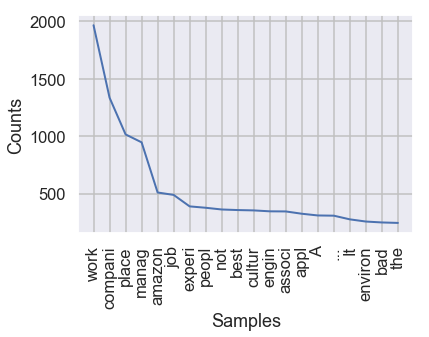

In [34]:
# Step Five: Plot the Frequency Distributions
sns.set()
sns.set_context('talk')
fdist_summary.plot(20,cumulative=False)

### Frequency Distribution: Pros

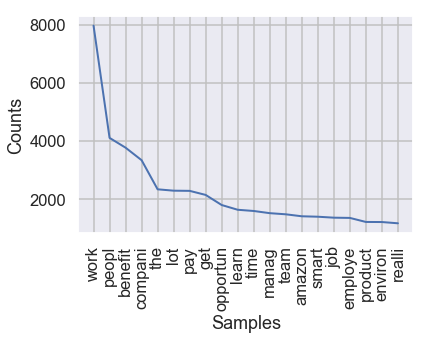

In [35]:
fdist_pros.plot(20,cumulative=False)

### Frequency Distribution: Cons

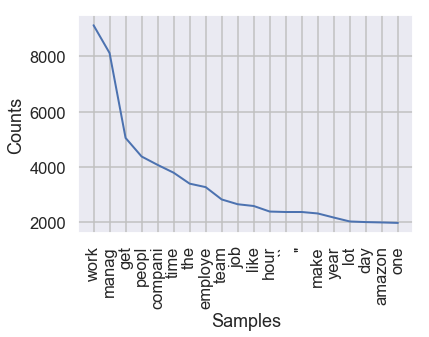

In [36]:
fdist_cons.plot(20,cumulative=False)

### Frequency Distribution: Advice

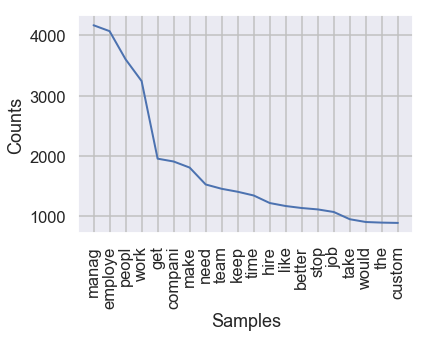

In [37]:
fdist_advice.plot(20,cumulative=False)

Just judging from the above word frequency analysis, it seems as if the problem with the companies doesn't lie with the lack of compensation or benefits, as many reviews in the pros column seem to mention it, but with the management and the culture of these companies, an aspect regularly pointed out in the advice and cons reviews. To further analyze whether these two factors actually do have an overall effect in the likelihood of one quitting, we decided to do calculate the weights of these words in each text column using TF-IDF. To start the analysis with TF-IDF, we got our text ready by making sure all our words are lower case, removing punctuation from each, and then providing the text (corpus) to TfidfVectorizer.

In [38]:
# get list of the text columns from each individual
summary_list = list(df_reviews['summary'].values)
pros_list = list(df_reviews['pros'].values)
cons_list = list(df_reviews['cons'].values)
advice_list = list(df_reviews['advice_to_management'].values)

# lowercase text
summary = list(map(str.lower, summary_list))
pros = list(map(str.lower, pros_list))
cons = list(map(str.lower, cons_list))
advice = list(map(str.lower, advice_list))

# remove punctuation
for c in string.punctuation:
    summary=str(summary).replace(c,"")
    pros=str(pros).replace(c,"")
    cons=str(cons).replace(c,"")
    advice=str(advice).replace(c,"")
    
# get list of four columns together
corpus = [str(summary),str(pros),str(cons),str(advice)]

Next, we used a TfidfVectorizer to transform the text into vectors and then used the vectors to calculate the TF-IDF across the words in the matrix we created. 

In [39]:
# define stop words for the vectorizer
stop_words=set(stopwords.words("english"))

# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

# calculate TF-IDF
reviews_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
reviews_tfidf.columns = tfidf.get_feature_names()
reviews_tfidf.rename(index={0:'summary',1:'pros',2:'cons',3:'advice'}, inplace=True)

C:\Users\jonbi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


With this new dataframe containing the TF-IDF of each word, we can see which word is most unique in each review column

In [40]:
reviews_tfidf.sort_values(by='summary', axis=1, ascending=False).iloc[:, : 10]

,great,work,company,place,good,manager,amazon,job,people,experience
summary,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05
pros,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,0.04,0.03
cons,0.03,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.04,0.03
advice,0.03,0.04,0.04,0.03,0.04,0.03,0.03,0.04,0.04,0.03


In [41]:
reviews_tfidf.sort_values(by='pros', axis=1, ascending=False).iloc[:, : 10]

,work,great,good,people,benefits,company,pay,get,working,time
summary,0.06,0.06,0.06,0.05,0.05,0.06,0.05,0.05,0.05,0.04
pros,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
cons,0.04,0.03,0.03,0.04,0.03,0.04,0.03,0.04,0.03,0.04
advice,0.04,0.03,0.04,0.04,0.03,0.04,0.03,0.04,0.03,0.04


In [42]:
reviews_tfidf.sort_values(by='cons', axis=1, ascending=False).iloc[:, : 10]

,work,people,get,management,company,time,employees,managers,dont,like
summary,0.06,0.05,0.05,0.05,0.06,0.04,0.05,0.04,0.05,0.05
pros,0.04,0.04,0.04,0.03,0.04,0.04,0.04,0.03,0.03,0.04
cons,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03
advice,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


In [43]:
reviews_tfidf.sort_values(by='advice', axis=1, ascending=False).iloc[:, : 10]

,people,employees,work,management,company,get,dont,managers,keep,make
summary,0.05,0.05,0.06,0.05,0.06,0.05,0.05,0.04,0.03,0.04
pros,0.04,0.04,0.04,0.03,0.04,0.04,0.03,0.03,0.03,0.04
cons,0.04,0.03,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03
advice,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


These initial dataframes did not prove to be particularly helpful because of words that don't seem to have any meaning without context as well as words that seem to be useless to our analysis, such as 'company', 'place', possible phrases like job titles and company names, particularly Amazon. We decided to reconduct this analysis, this time removing the words above and tokenizing the words into bigrams.

In [44]:
# Create lists
summary_list = list(df_reviews['summary'].values)
pros_list = list(df_reviews['pros'].values)
cons_list = list(df_reviews['cons'].values)
advice_list = list(df_reviews['advice_to_management'].values)

# lowercase text
summary = list(map(str.lower, summary_list))
pros = list(map(str.lower, pros_list))
cons = list(map(str.lower, cons_list))
advice = list(map(str.lower, advice_list))

# remove punctuation
for c in string.punctuation:
    summary=str(summary).replace(c,"")
    pros=str(pros).replace(c,"")
    cons=str(cons).replace(c,"")
    advice=str(advice).replace(c,"")
    
# Remove unnecessary words from responses
summary=summary.replace('company','')
pros=pros.replace('company','')
cons=cons.replace('company','')
advice=advice.replace('company','')

summary=summary.replace('place','')
pros=pros.replace('place','')
cons=cons.replace('place','')
advice=advice.replace('place','')

summary=summary.replace('software engineer','')
pros=pros.replace('software engineer','')
cons=cons.replace('software engineer','')
advice=advice.replace('software engineer','')

summary=summary.replace('software development engineer','')
pros=pros.replace('software development engineer','')
cons=cons.replace('software development engineer','')
advice=advice.replace('software development engineer','')

summary=summary.replace('program manager','')
pros=pros.replace('program manager','')
cons=cons.replace('program manager','')
advice=advice.replace('program manager','')

summary=summary.replace('senior','')
pros=pros.replace('senior','')
cons=cons.replace('senior','')
advice=advice.replace('senior','')

summary=summary.replace('associate','')
pros=pros.replace('associate','')
cons=cons.replace('associate','')
advice=advice.replace('associate','')

summary=summary.replace('amazon','')
pros=pros.replace('amazon','')
cons=cons.replace('amazon','')
advice=advice.replace('amazon','')

summary=summary.replace('facebook','')
pros=pros.replace('facebook','')
cons=cons.replace('facebook','')
advice=advice.replace('facebook','')

summary=summary.replace('twitter','')
pros=pros.replace('twitter','')
cons=cons.replace('twitter','')
advice=advice.replace('twitter','')

summary=summary.replace('google','')
pros=pros.replace('google','')
cons=cons.replace('google','')
advice=advice.replace('google','')

summary=summary.replace('microsoft','')
pros=pros.replace('microsoft','')
cons=cons.replace('microsoft','')
advice=advice.replace('microsoft','')

In [45]:
# Utility functions

# Bigram tokenizer function
def bigrams(word_data):
    gram_tokens = nltk.word_tokenize(word_data)
    bigram_tokens = nltk.bigrams(gram_tokens)
    return list(bigram_tokens)

# Pre-vectorizer stop word remover
def rm_stop(response):
    output_list = []
    tokenized_response = nltk.word_tokenize(response)
    for word in tokenized_response: 
        if (word not in stop_words):
            output_list.append(word)
    return ' '.join(output_list)

In [46]:
# Remove stop words from texts
summary = rm_stop(summary)
pros = rm_stop(pros)
cons = rm_stop(cons)
advice = rm_stop(advice)

# get list of four columns together into corpus
corpus = [str(summary),str(pros),str(cons),str(advice)]

In [47]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=bigrams)

# calculate TF-IDF
reviews_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
reviews_tfidf.columns = tfidf.get_feature_names()
reviews_tfidf.rename(index={0:'summary',1:'pros',2:'cons',3:'advice'}, inplace=True)

### Summary TF-IDF Dataframe and Accompanying Bar Plot (Bigrams)

In [48]:
reviews_tfidf.sort_values(by='summary', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(great, work)","(great, learning)","(good, benefits)","(work, great)","(good, work)","(customer, service)","(area, manager)","(best, work)","(great, coworkers)","(work, life)"
summary,0.08,0.08,0.07,0.07,0.07,0.06,0.06,0.06,0.06,0.06
pros,0.04,0.04,0.05,0.04,0.04,0.03,0.02,0.03,0.05,0.04
cons,0.03,0.00,0.02,0.02,0.03,0.03,0.03,0.02,0.00,0.04
advice,0.04,0.00,0.00,0.02,0.04,0.03,0.02,0.03,0.00,0.04


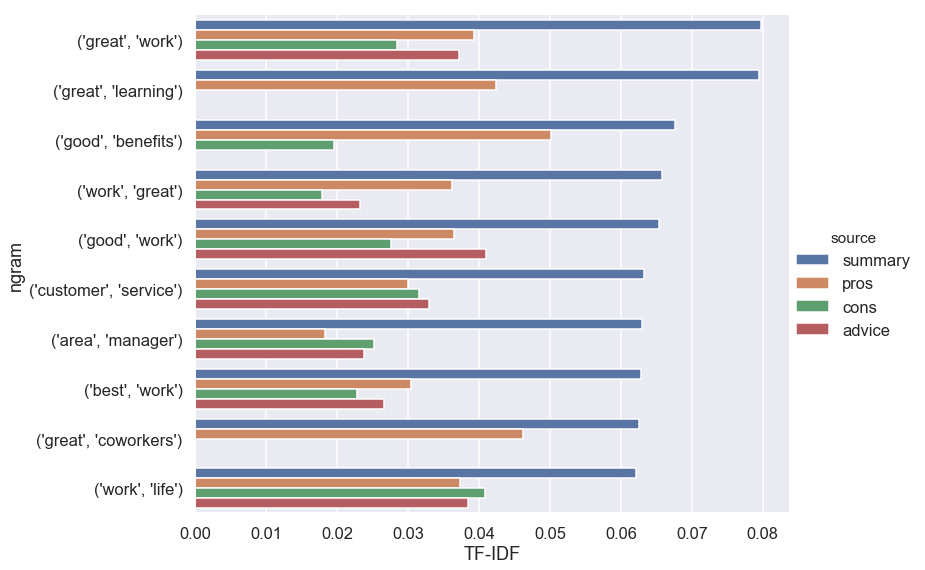

In [49]:
# Draw a nested barplot for TF-IDF
sns.set()
sns.set_context('talk')
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

From the above dataframe and barplot, we can see that many summarize their experience working at these companies as 'great work', 'great learning' and 'good benefits'. From this we may be able to gather that compensation as well as the opportunities that come with the job are well-liked by employees.

### Pros TF-IDF Dataframe and Accompanying Bar Plot (Bigrams)

In [50]:
reviews_tfidf.sort_values(by='pros', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(benefits, discounts)","(good, benefits)","(meet, lot)","(lots, opportunities)","(benefits, including)","(friendly, coworkers)","(excellent, benefits)","(fantastic, benefits)","(benefits, amazing)","(great, coworkers)"
summary,0.00,0.07,0.00,0.04,0.00,0.00,0.05,0.00,0.02,0.06
pros,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
cons,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
advice,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


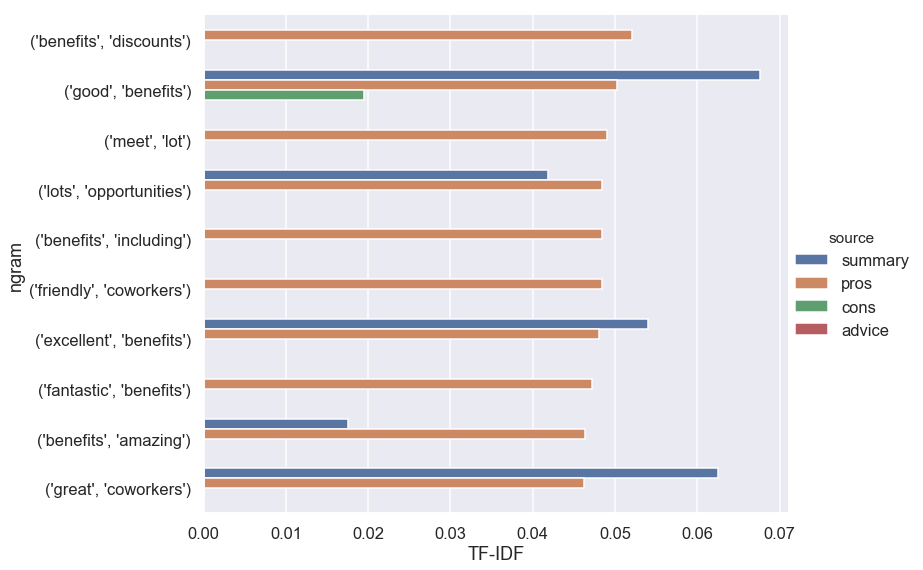

In [51]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

The dataframe and barplot above concerning the pros of the job only further confirms our conclusion that many people find the benefits and opportunities at these large tech companies very desirable.

### Cons TF-IDF Dataframe and Accompanying Bar Plot (Bigrams)

In [52]:
reviews_tfidf.sort_values(by='cons', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(retail, hours)","(worklife, balance)","(work, life)","(life, balance)","(lots, politics)","(way, much)","(like, youre)","(long, hours)","(mandatory, overtime)","(non, existent)"
summary,0.03,0.06,0.06,0.06,0.05,0.00,0.00,0.05,0.00,0.00
pros,0.00,0.04,0.04,0.04,0.00,0.00,0.03,0.02,0.02,0.00
cons,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
advice,0.00,0.04,0.04,0.04,0.00,0.03,0.00,0.03,0.02,0.02


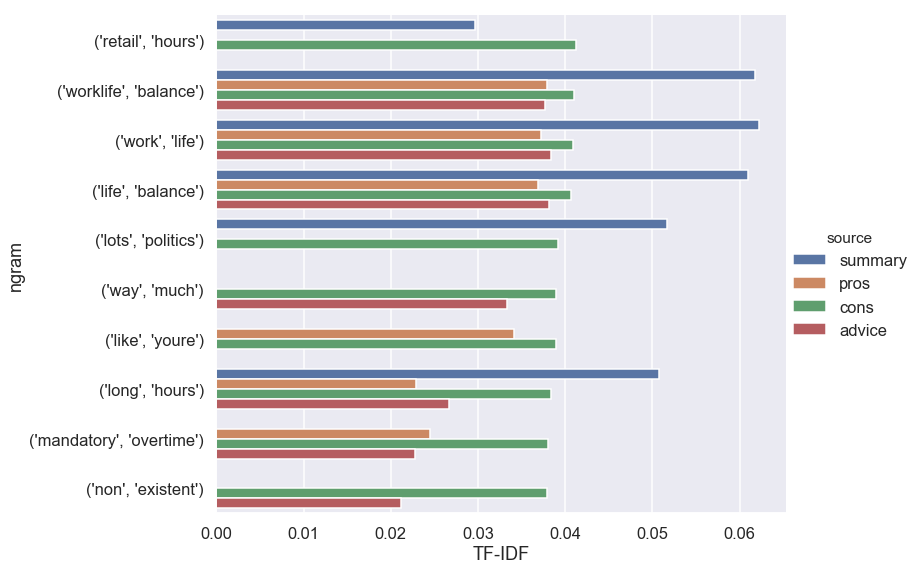

In [53]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

In the cells above, we see that many describe the cons of these jobs as 'long hours', 'worklife balance', and 'lots politics'. From this we may be able to gather that many people dislike the lack of balance that positions at large tech companies give them. We even see 'mandatory overtime' which suggest that these people may be overworked and exhausted. The mention of politics may also hint at a possible downfall of culture in the company.

### Advice TF-IDF Dataframe and Accompanying Bar Plot (Bigrams)

In [54]:
reviews_tfidf.sort_values(by='advice', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(keep, youre)","(stop, treating)","(stop, playing)","(bring, back)","(people, stop)","(start, treating)","(employees, human)","(stop, hiring)","(advice, management)","(keep, good)"
summary,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00
pros,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.01
cons,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.18e-03,0.02,0.02
advice,0.07,0.07,0.06,0.06,0.05,0.05,0.05,5.33e-02,0.05,0.05


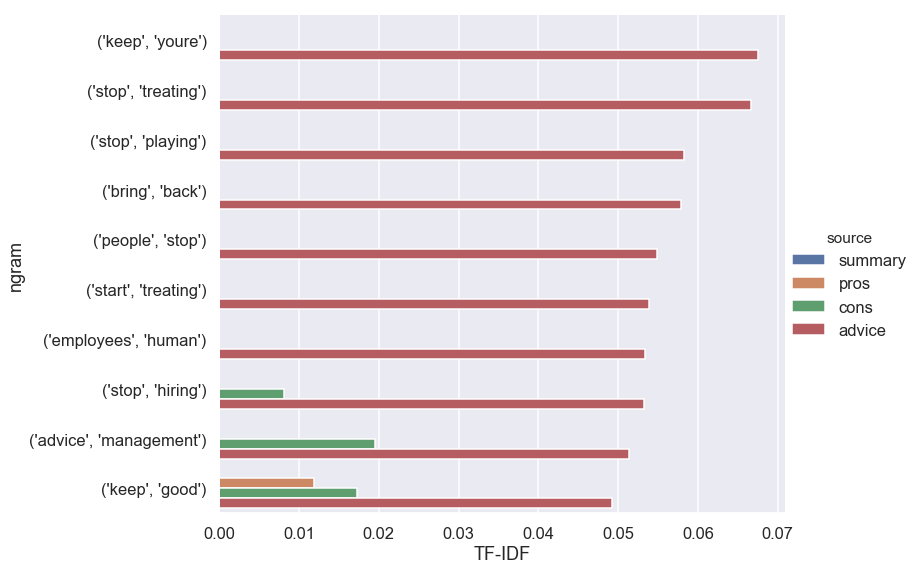

In [55]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

The above cells let us see that many reviewers gave advice regarding treatment of company employees. There seem to be many people mentioning how management should 'stop treating' employees some way and even mentioning 'employees human' which may imply that there don't exist very humane conditions at these companies.

With the bigrams, we get a more accurate read of what people think of working at big companies and what people like and dislike about working at these big companies. However, doing a trigram and four-gram wouldn't hurt to gather more context around these words.

In [56]:
# ngram functions

# Trigram tokenizer function
def trigrams(word_data):
    gram_tokens = nltk.word_tokenize(word_data)
    bigram_tokens = nltk.trigrams(gram_tokens)
    return list(bigram_tokens)

# Fourgram tokenizer function
def fourgrams(word_data):
    gram_tokens = nltk.word_tokenize(word_data)
    ngram_tokens = nltk.ngrams(gram_tokens, 4)
    return list(ngram_tokens)

In [57]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=trigrams)

# calculate TF-IDF
reviews_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
reviews_tfidf.columns = tfidf.get_feature_names()
reviews_tfidf.rename(index={0:'summary',1:'pros',2:'cons',3:'advice'}, inplace=True)

### Summary TF-IDF Dataframe and Accompanying Bar Plot (Trigrams)

In [58]:
reviews_tfidf.sort_values(by='summary', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 25]

,"(customer, service, representative)","(great, work, best)","(area, manager, great)","(home, advisor, great)","(family, room, specialist)","(product, marketing, manager)",...,"(work, good, work)","(manager, great, work)","(great, benefits, great)","(great, great, people)","(great, learn, grow)","(apple, home, advisor)"
summary,0.1,0.1,0.1,0.1,0.09,0.09,...,0.08,7.29e-02,0.07,0.07,0.07,0.07
pros,0.0,0.0,0.0,0.0,0.00,0.00,...,0.03,7.86e-03,0.05,0.03,0.02,0.00
cons,0.0,0.0,0.0,0.0,0.03,0.00,...,0.00,9.82e-03,0.00,0.00,0.00,0.03
advice,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00e+00,0.00,0.00,0.00,0.00


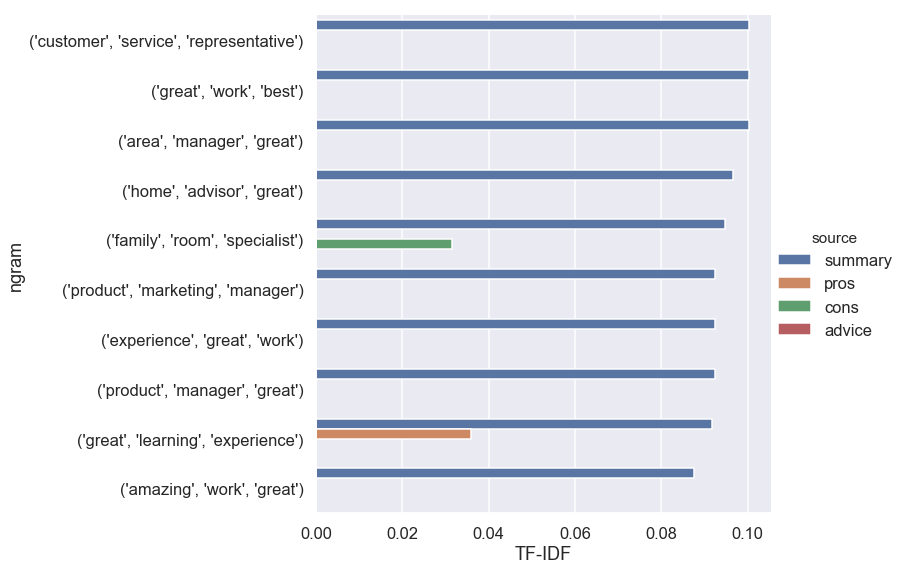

In [59]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

From adding more context in the summary column, we get less helpful phrases, which are mostly job titles, but we are also greeted with more reviews mentioning the great benefits, opportunities, and work.

### Pros TF-IDF Dataframe and Accompanying Bar Plot (Trigrams)

In [60]:
reviews_tfidf.sort_values(by='pros', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(looks, great, resume)","(great, benefits, great)","(flexible, working, hours)","(work, really, smart)","(ability, work, home)","(pay, good, benefits)","(great, pay, benefits)","(super, smart, people)","(work, good, benefits)","(great, benefits, lots)"
summary,0.00,0.07,0.00,0.00,0.00,0.04,0.07,0.00,0.00,0.00
pros,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
cons,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
advice,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


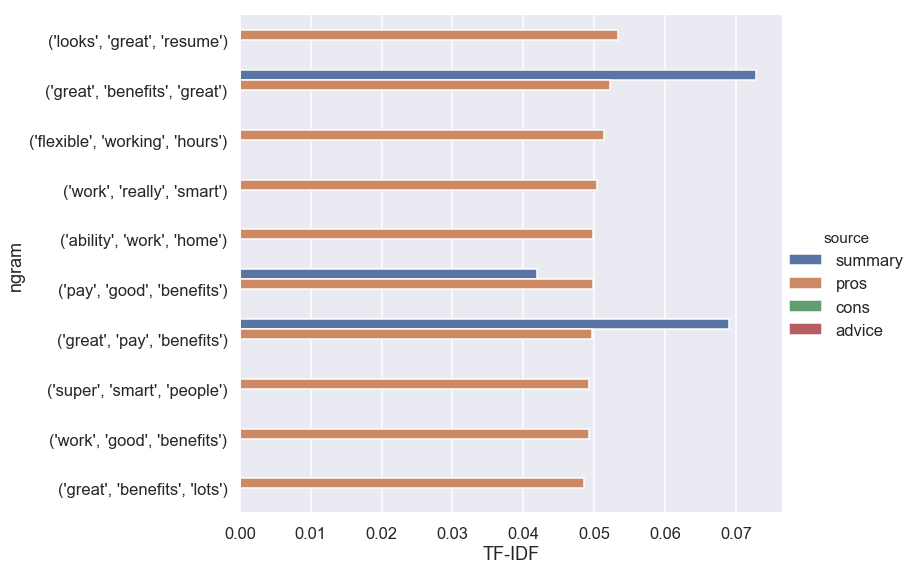

In [61]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

Again, the pros column seems to mention many benefits and opportunities like 'ability work home' (the ability to work from home), 'great pay benefits', 'looks great resume', and 'super smart people'. We get more context on what the great benefits and opportunities are, which seem to be the pay, the leniency, the resume boost, and the people.

### Cons TF-IDF Dataframe and Accompanying Bar Plot (Trigrams)

In [62]:
reviews_tfidf.sort_values(by='cons', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(long, work, hours)","(work, life, balance)","(takes, long, time)","(dont, care, employees)","(extremely, long, hours)","(managers, dont, know)","(poor, management, poor)","(worklife, balance, nonexistent)","(high, employee, turnover)","(feet, 10, hours)"
summary,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pros,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
cons,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05
advice,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


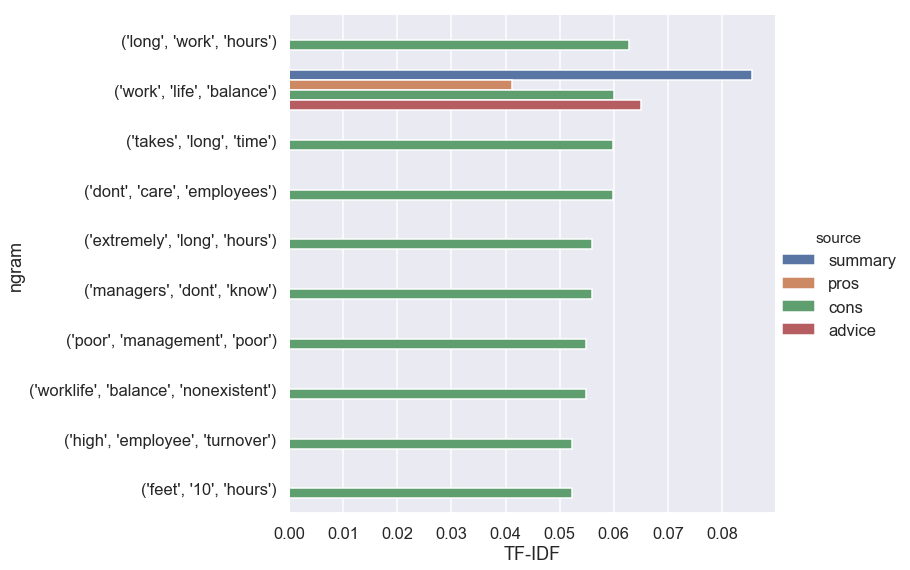

In [63]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

From the above dataframe and plot, we also gain greater insight into the bad qualities of the job which seem to be long hours, a lack of worklife balance, managers who don't care about their employees, and just poor management overall. More and more, it seems to be that worklife balance and management bring down these highly-sought-after positions.

### Advice TF-IDF Dataframe and Accompanying Bar Plot (Trigrams)

In [64]:
reviews_tfidf.sort_values(by='advice', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(keep, great, work)","(keep, good, work)","(treat, employees, respect)","(treating, people, like)","(stop, playing, favorites)","(stop, treating, employees)","(good, work, keep)","(get, rid, stack)","(rid, stack, ranking)","(stop, treating, people)"
summary,0.00,0.00e+00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pros,0.00,9.71e-03,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
cons,0.00,0.00e+00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
advice,0.11,1.02e-01,0.1,0.09,0.09,0.09,0.09,0.09,0.08,0.08


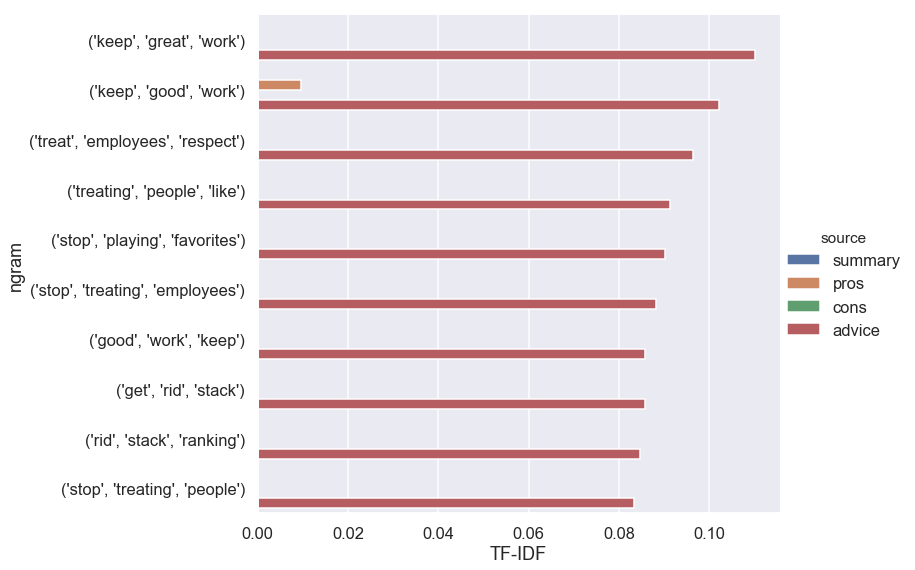

In [65]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

We see similar comments regarding management in the advice column as we did in the cons column. There seems to be poor treatment and lack of respect for employees as well as favoritism. Managers are being chastised in the advice column as they're being told to stop treating people badly.

In [66]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=fourgrams)

# calculate TF-IDF
reviews_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
reviews_tfidf.columns = tfidf.get_feature_names()
reviews_tfidf.rename(index={0:'summary',1:'pros',2:'cons',3:'advice'}, inplace=True)

### Summary TF-IDF Dataframe and Accompanying Bar Plot (Four-grams)

In [67]:
reviews_tfidf.sort_values(by='summary', axis=1, ascending=False, inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(great, work, great, work)","(work, hard, make, history)","(great, people, great, work)","(work, best, ive, ever)","(one, best, companies, worked)","(great, work, apple, retail)","(ive, ever, worked, great)","(best, job, ive, ever)","(work, hard, fun, make)","(hard, fun, make, history)"
summary,0.13,0.13,0.13,0.13,0.13,0.13,0.12,0.12,0.12,0.11
pros,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.03,0.03
cons,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03
advice,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.04


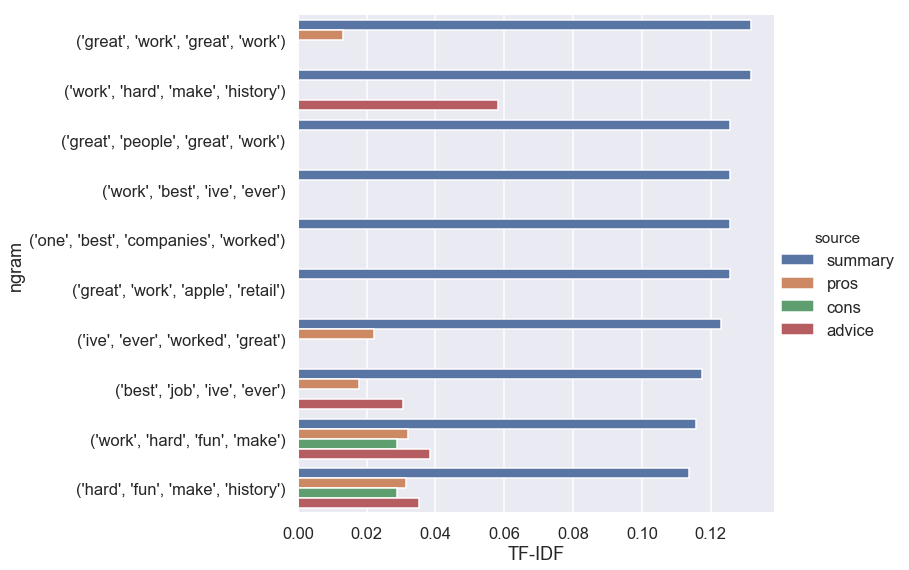

In [68]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

When we add more words and context, we get more complete summaries of people's experiences and many of them seem to enjoy working at the companies. Underneath this, however, seems to lie a dark underbelly of poor management and lack of worklife balance.

### Pros TF-IDF Dataframe and Accompanying Bar Plot (Four-grams)

In [69]:
reviews_tfidf.sort_values(by='pros', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(4, day, work, week)","(work, really, smart, people)","(good, pay, great, benefits)","(smart, people, great, benefits)","(paid, time, vacation, time)","(benefits, work, life, balance)","(great, benefits, great, pay)","(good, pay, good, benefits)","(working, really, smart, people)","(pay, great, benefits, great)"
summary,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
pros,0.07,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05
cons,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
advice,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


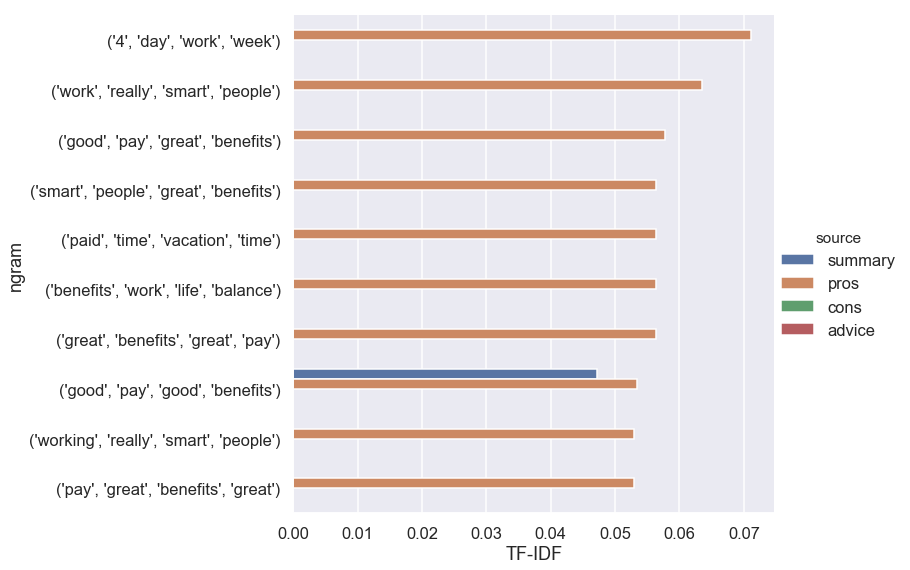

In [70]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

The above cells just confirm what we already know: the benefits are great.

### Cons TF-IDF Dataframe and Accompanying Bar Plot (Four-grams)

In [71]:
reviews_tfidf.sort_values(by='cons', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(work, life, balance, difficult)","(work, life, balance, poor)","(absolutely, work, life, balance)","(poor, work, life, balance)","(work, life, balance, hard)","(work, life, balance, terrible)","(2, 15, minute, breaks)","(work, life, balance, tough)","(work, life, balance, horrible)","(terrible, work, life, balance)"
summary,0.00,0.08,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.10
pros,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
cons,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
advice,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00


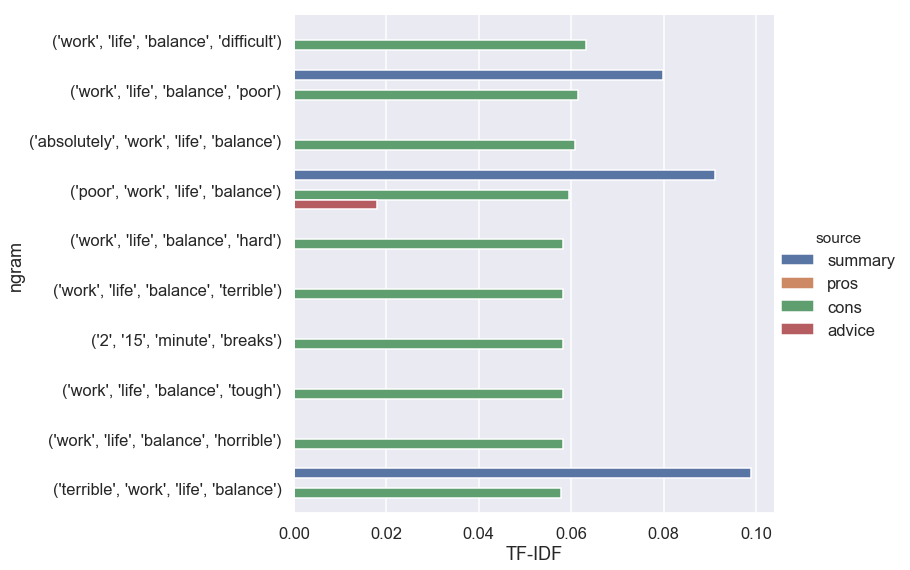

In [72]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

When we added more context, worklife balance seems to be the most prominent con of working at these companies. What's even more shocking is the mention of only '2 15 minute breaks'. There seems to be a real lack of humane treatment at some of the work locations!

### Advice TF-IDF Dataframe and Accompanying Bar Plot (Four-grams)

In [73]:
reviews_tfidf.sort_values(by='advice', axis=1, ascending=False,inplace=True)
reviews_tfidf.iloc[:, : 10]

,"(keep, good, work, keep)","(stop, treating, people, like)","(get, rid, stack, ranking)","(stop, treating, employees, like)","(none, none, none, none)","(dont, treat, employees, like)","(treat, employees, like, humans)","(treat, employees, like, people)","(treat, people, like, people)","(treat, people, like, humans)"
summary,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00
pros,0.00,0.0,0.0,0.0,0.03,0.0,0.00,0.00,0.00,0.00
cons,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.02,0.00,0.00
advice,0.11,0.1,0.1,0.1,0.10,0.1,0.09,0.09,0.09,0.09


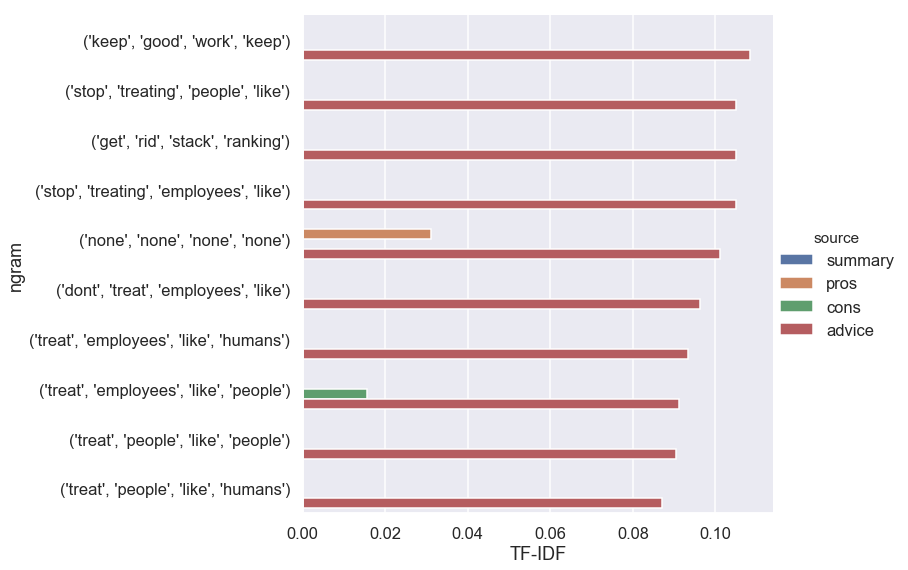

In [74]:
# Draw a nested barplot for TF-IDF
barplot_frame = reviews_tfidf.iloc[:,:10].reset_index().rename(columns={'index':'source'}).melt('source', var_name='ngram', value_name='TF-IDF')
ax=sns.catplot(data=barplot_frame, x='TF-IDF', y='ngram', hue='source', height=8.27, aspect=11.7/8.27, kind='bar')

The advice to management seems to further mention the lack of humane treatment as they plead management to 'treat people like people' and 'treat people like humans'.

Overall, the analyses we performed points to worklife balance, corporate politics, management, and strenuous and competitive work environments as the main culprits causing any disdain employees and former employees may have against the companies they work or worked for. 

# Ethics & Privacy

### __Data Collection:__<br/>
This dataset is public on kaggle.com and the data within the set was collected from a public job-finding site called glassdoor.com; given the amount of exposure both of these sites receive, it can be safely assumed that the people giving the reviews as well as glassdoor.com have given their consent to the release of the data provided in the dataset. This data was not collected by us, but we have considered several questions that led to some suspicion as to any possible biases that may exist in the dataset. We asked ourselves why people would voluntarily be leaving reviews for these companies and whether a possible cause may be that the companies provide an incentive for leaving reviews, particularly positive ones. From these inquiries, we concluded that there may exist some underlying bias in the reviews that can decrease the overall integrity of the data. We also concluded that negative reviews would be less likely to appear on public sites like glassdoor.com simply because former employees do not want their personal information associated with a negative review as it could lead to the company as well as other tech companies to black-ball them.

### __Data Storage:__<br/>
The data is publicly available, but we’ll be storing it in a private team drive, to which only our group members have access.

### __Analysis:__<br/>
Our analyses will contain no personal identifiable information as we will be omitting any such information like the link to their Glassdoor review. The text and sentiment analysis we will perform on the reviews will also be completely impartial and unbiased since we will not be deliberately omitting any data that may skew the results a certain way; however, it’s assumed that these analyses will be done on possibly biased reviews as we concluded above. In our analyses, we will also take into consideration the numerical variables, such as the ratings, as well as addressing any missing values that appear in the dataset.

### __Modeling:__<br/>
In our models, we are taking into consideration the following variables: location, job title, summary, pros, cons, advice to management, overall ratings, work/life balance ratings, culture and values ratings, career opportunities ratings and compensation and benefits ratings. We are utilizing these variables to try and pinpoint the most likely cause of the high turnover rate; with these variables we will be able to determine whether there’s an issue with a specific location, the work environment, the future career prospects, and even the salary and benefits each employee is given. We can amalgamate the location information with the numerical values of the ratings and the text/sentiment analysis from the reviews in order to get an accurate cause of the high turnover rate in the tech industry.

### __Deployment:__<br/>
The results we will present will most likely not lead to harm or discrimination as employees whose reviews are used will remain anonymous since we will be omitting the link to their review and not revealing their entire review. We have taken into consideration that our results will likely be valued by companies and others seeking employment from companies in the tech industry as it can help them determine what causes the high turnover rate in similar positions. If it somehow happens that harm comes to some people whose data we have received, we may update our results with their information omitted or reevaluate our analysis with new variables that may make our results more agreeable.


# Conclusion & Discussion

### __Limitations:__ <br/>

There are a few limitations to our project. In the text analysis part, Grammatical errors in responses were not completely cleaned up due to the range in possible typos. In the data analysis part, we come up with a correlation value for each category (work_balance, culture_and_values, and compensation_and_benefits). However, it would be imprudent to say if the correlations are strong or not just based on the correlation coefficients themselves we got from data analysis; the fact that we do not know the distribution of correlations of each specific field hinders us to provide a dependable conclusion for why people are leaving their jobs (for instance, the true mean of the correlation between work balance and overall score people would give to the company is 0.8 in the distribution which is higher than the 0.6 we got from the dataset, then we cannot say 0.6 is strong correlation, but if we just have the value 0.6, it is most likely for us to conclude there is a strong correlation). Fortunately, we also have the text analysis to support our conclusion, which make it more reliable. Another limitation, however, to our text analysis is that we didn't consider the jobs that people had nor the locations where they worked, something that may have an effect on their overall satisfaction with the job. This was due to lack of viable data from this dataset as many didn't leave that information available on their reviews as well as time constraints. After people leaving their jobs, we don’t know if they are going to another big company listed in the dataset. Also, people’s standards are different. For instance, both are giving a 4 for the same category, but one would actually rate another’s experience as a 3 or a different number from 4. Last but not least, we can’t tell if people leave companies is because the company stopped hiring them or is it because they do not want to work in these renowned companies.

### __Impact on Society:__ <br/>
Our project has found that unbalanced work and career opportunities as well as management and team are some of the main reasons why some people would quit companies. However, it does not seem that their pay and salary is not a reason why someone would quit or leave their company. Companies should prioritize just more than just salary in order to maintain high worker morale. If companies wish to maintain higher ratings on sites like glassdoor.com as well as increase retention and decrease attrition, that company should prioritize the quality of their career opportunities, workload, and management in order to make their workers more satisfied. Simply raising salaries won’t necessarily make a worker stay at a company, especially if that worker is on the verge of quitting. Prioritizing the improvement of the quality of the work experience is something that all companies, not just tech companies should do. If a job has an unpleasant experience, there is no amount of money that would make that job worth doing.


### __Conclusion:__ <br/>

Our goal of this project is to demonstrate if there are correlations between the turnover rate for large tech companies and corporate politics, work environment, and compensation. We predicted that competitive working environment, unsatisfactory compensation and non-ideal management can cause them to leave. The dataset we are analyzing is public on kaggle.com. 
This dataset is public on kaggle.com and the data within the set was collected from a public job-finding site called glassdoor.com. After analysis, we were able to determine that unbalanced worklife and management are some reasons why employees quit companies due to the text analysis done as it's seen that management and team are mentioned frequently when former employees for cons and advice. Therefore, our data analysis supports our hypothesis that unsatisfactory working environment and management are the main reasons for high turnover rate. However, compensation seems to not be the reason. Instead, participants are more than pleased with their payments.

